<a href="https://colab.research.google.com/github/amyas-lab/Machine-Learning-Models/blob/main/Credit_Card_Customer_Segmentation_using_K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview
This project performs unsupervised learning to segment credit card customers based on their spending and payment behaviors. The goal is to help financial institutions design targeted marketing and credit strategies for different customer groups.

## About the data set

The dataset we will be working on is 'credit-card-holder-data.csv'. It is composed of attributes such as balance of the credit card, ammount of purchase, etc., to develop a customer segmentation model.  


## About the structure of this project
- Part 1: Coding Tasks
- Part 2: Discussion and Business Applications

# Part 1: Coding Tasks

## Load the dataset

In [ ]:
# Load pandas library
import pandas as pd
import numpy as np
#Import the necessary packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load dataset in pandas dataframe
df = pd.read_csv("credit-card-holder-data.csv")

In [ ]:
# Show several
df.head()

Unnamed: 0      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0           0    40.900749           0.818182      95.40              0.00   
1           1  3202.467416           0.909091       0.00              0.00   
2           2  2495.148862           1.000000     773.17            773.17   
3           3  1666.670542           0.636364    1499.00           1499.00   
4           4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000        864.206542          0.000000      12  
4   678.334763        244.791237          0.000000      12

This is a dataset for developing a customer segmentation. The dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

- BALANCE: Balance amount left in their account to make purchases.
- BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated).
- PURCHASES: Amount of purchases made from account.
- ONEOFF_PURCHASES: Maximum purchase amount done in one-go (i.e., one-time payment for a purchase).
- INSTALLMENTS_PURCHASES: Amount of purchase done in installment (i.e., multiple payments for a purchase). Observation: PURCHASES = ONEOFF_PURCHASE + INSTALLMENT_PURCHASES).
- CASH_ADVANCE: Cash in advance given by the user (a cash advance is when taking money out of the ATM using credit card instead of debit card or ATM card).
- PURCHASES_FREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased).
- ONEOFF_PURCHASES_FREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased).
- PURCHASES_INSTALLMENTS_FREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done).
- CASH_ADVANCE_FREQUENCY: How frequently the cash in advance being paid.
- CASH_ADVANCE_TRX: Number of Transactions made with "Cash in Advanced".
- PURCHASES_TRX: Number of purchase transactions made.
- CREDIT_LIMIT: Limit of Credit Card for user.
- PAYMENTS: Amount of payment done by user (i.e., payment for the use of credit card)
- MINIMUM_PAYMENTS: Minimum amount of payments made by user.
- PRC_FULL_PAYMENT: Percent of full payment paid by user.
- TENURE: Tenure of credit card service for user (i.e., how long (in months) you should have held the credit card before they will grant you credit).

## Data Cleaning

In [ ]:
# Show data information
df.info()
# The data is clean with no missing values, hence no need for data imputation
# There is no categorical feature


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        8950 non-null   int64  
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

Missing values per column:
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

Descriptive statistics:


BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8950.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.612411   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8950.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2330.588021          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        170.857654          0.000000    12.000000  
50%      856.901546        335.628312          0.000000    12.000000  
75%     1901.134317        864.206542          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

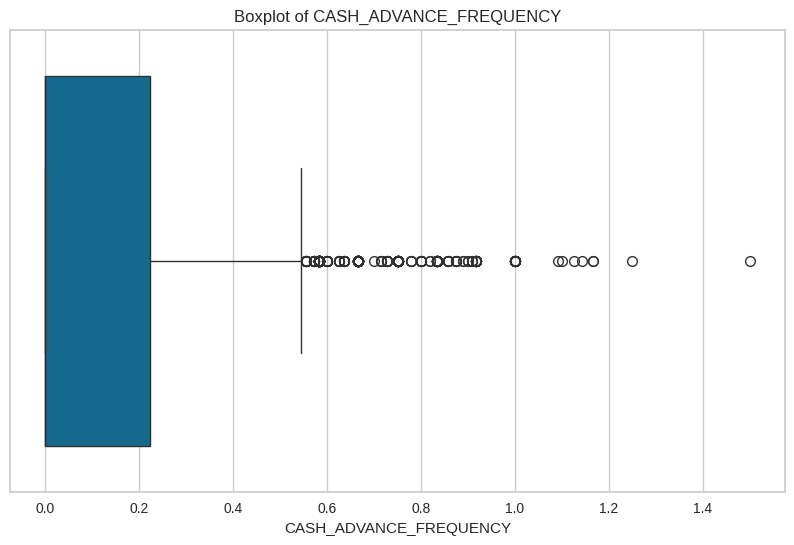

In [ ]:
# Drop the 'Unnamed: 0' column as it is just an index
df = df.drop('Unnamed: 0', axis=1)

# Although df.info() shows no missing values, let's double-check
print("Missing values per column:")
print(df.isnull().sum())

# Basic statistical analysis to identify potential issues like outliers
print("\nDescriptive statistics:")
display(df.describe())

# From the description table, CASH_ADVANCE_FREQUENCY might contain some outliers. Let's check by visualizaton.
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['CASH_ADVANCE_FREQUENCY'])
plt.title('Boxplot of CASH_ADVANCE_FREQUENCY')
plt.show()

# Drop rows where CASH_ADVANCE_FREQUENCY is greater than 1.0
df = df[df['CASH_ADVANCE_FREQUENCY'] <= 1.0].copy()

## Exploratory Data Analysis

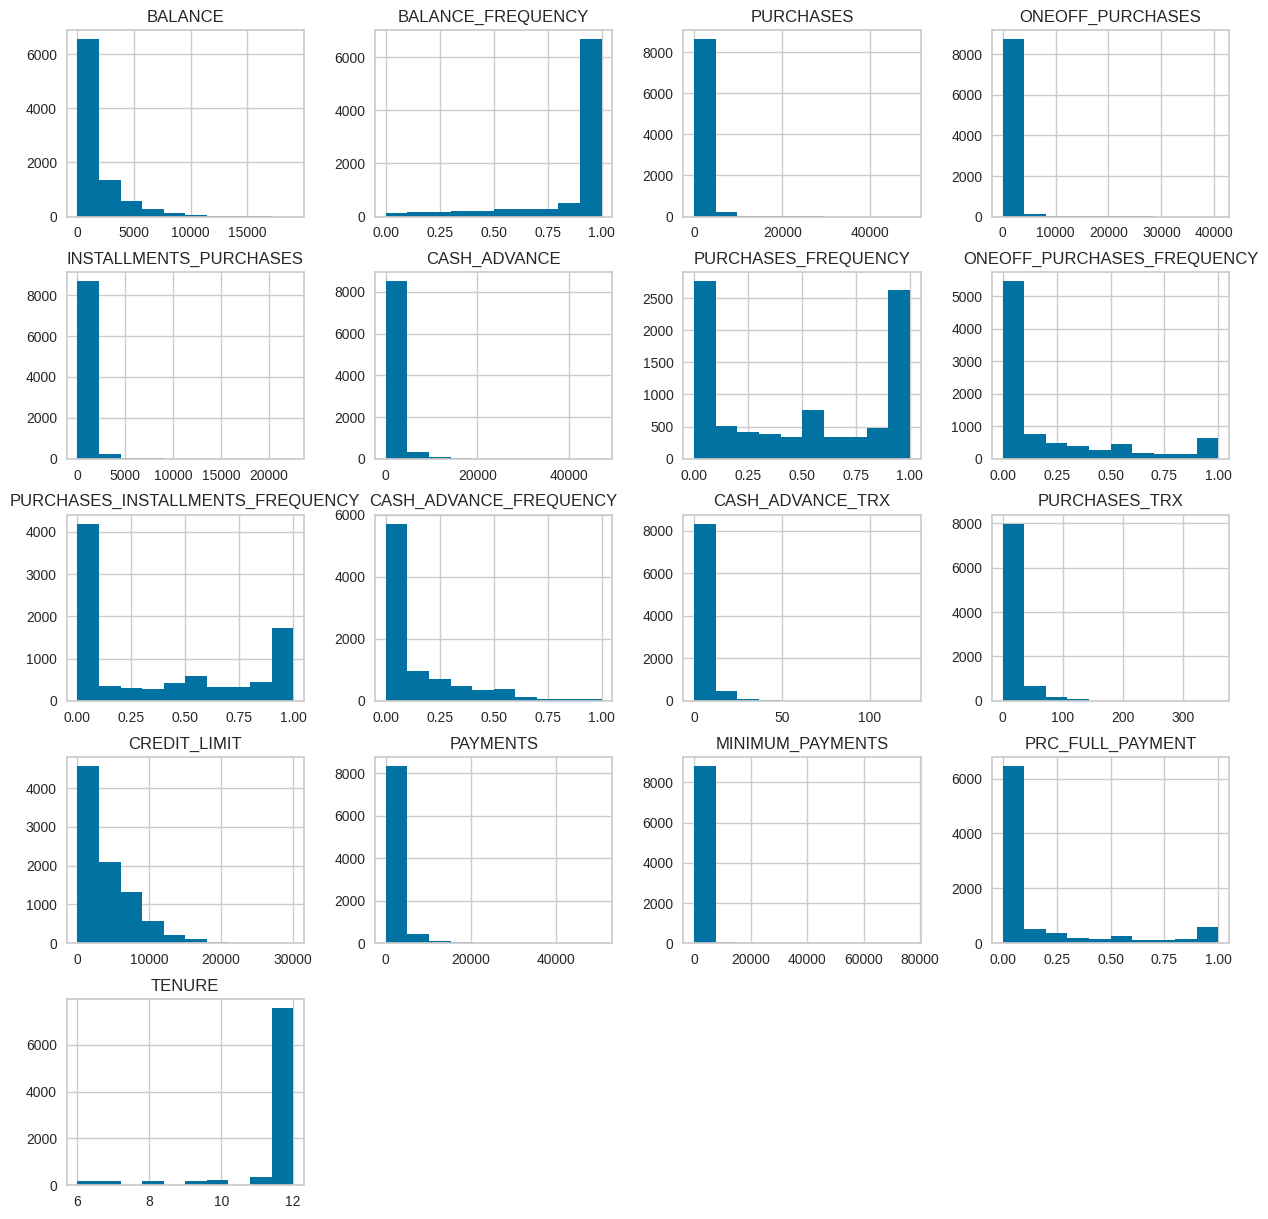

In [ ]:
#Plot histogram of all features
df.hist(figsize=(15,15))
plt.show()


**Observation:**

* Some histograms have more than one modes, implying the
potential of subgroups. This confirms the significance Of K-Means Clustering in identifying the number of potential subgroups.
* It turns out every feature has outliers. But this does not mean that we will delete the outliers, because it is possible that all of these values do happen on the field.

<Axes: >

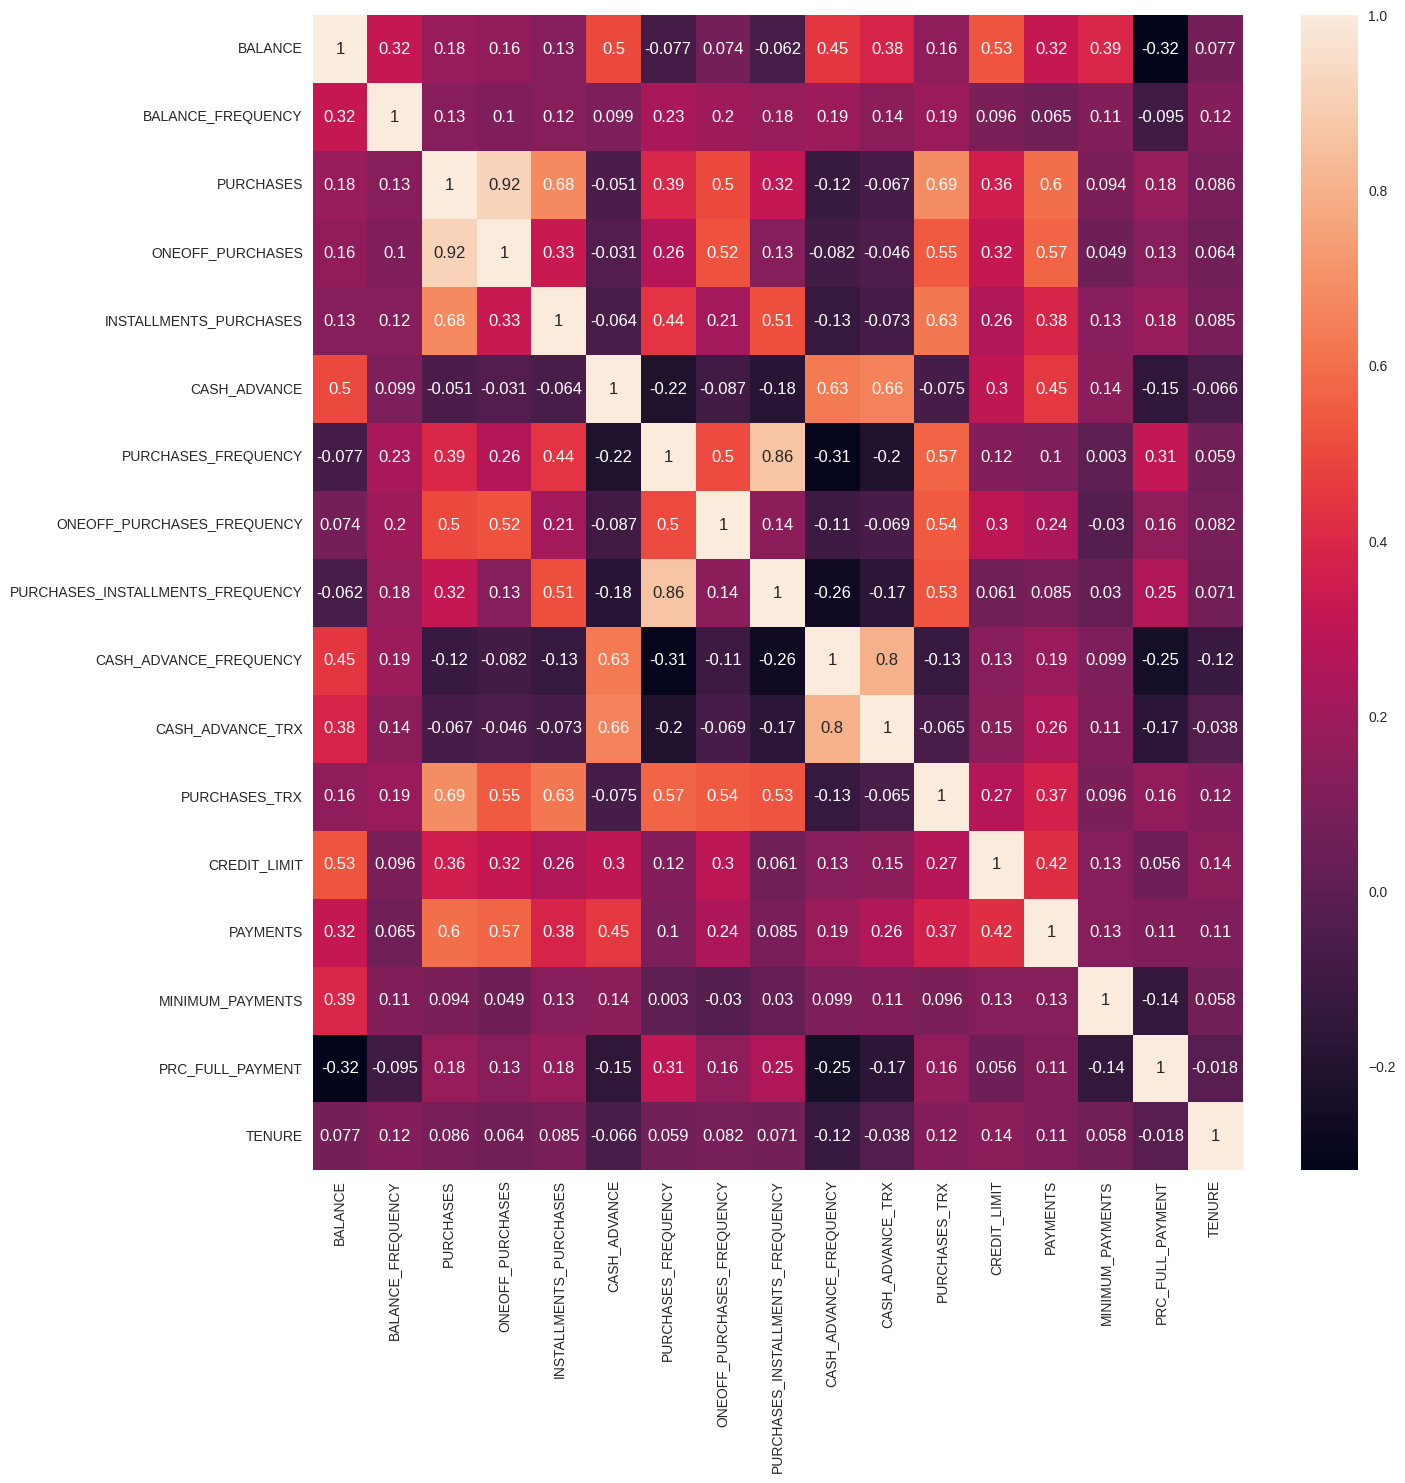

In [ ]:
# Polt the correlation heatmap between pairs of features.
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True)



**Analysis of the Correlation Heatmap:**

The heatmap reveals several interesting relationships between the features:

*   **Strong Positive Correlations:**
    *   `PURCHASES` is highly correlated with `ONEOFF_PURCHASES` and `INSTALLMENTS_PURCHASES`. This is expected, as `PURCHASES` is the sum of the other two.
    *   `PURCHASES_FREQUENCY` is highly correlated with `PURCHASES_INSTALLMENTS_FREQUENCY`. Customers who frequently make purchases are also likely to frequently make installment purchases.
    *   `ONEOFF_PURCHASES` is also strongly correlated with `ONEOFF_PURCHASES_FREQUENCY`.
    *   `CASH_ADVANCE` is strongly correlated with `CASH_ADVANCE_TRX` and `CASH_ADVANCE_FREQUENCY`.
    *   `PURCHASES_TRX` is strongly correlated with `PURCHASES_FREQUENCY` and `PURCHASES_INSTALLMENTS_FREQUENCY`.
    *   `CREDIT_LIMIT` shows positive correlations with `BALANCE` and `PAYMENTS`.
    *   `PAYMENTS` is positively correlated with `BALANCE`, `PURCHASES`, and `CREDIT_LIMIT`.

*   **Moderate Positive Correlations:**
    *   `BALANCE` shows moderate positive correlations with `PURCHASES`, `CASH_ADVANCE`, and their related frequency/transaction features.

*   **Weak or Negative Correlations:**
    *   Features related to purchases (e.g., `PURCHASES`, `PURCHASES_FREQUENCY`) generally have weak or negative correlations with features related to cash advances (e.g., `CASH_ADVANCE`, `CASH_ADVANCE_FREQUENCY`). This suggests different usage patterns among customers.
    *   `PRC_FULL_PAYMENT` shows negative correlations with `BALANCE` and `MINIMUM_PAYMENTS`, indicating that customers who pay in full more often tend to have lower balances and minimum payments.

This heatmap provides valuable insights into the relationships between different credit card usage behaviors, which can be helpful in understanding the resulting clusters.

## Data Preprocessing

We will apply a logarithmic scale to these features so that large values are compressed into smaller ranges, while still preserving the relative meaning and patterns within the data.

In [ ]:
# Make a copy of the data
data = df.copy()

In [ ]:
#Experimentation
logscaled_data = np.log2(data + 0.01)
logscaled_data.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0   5.354408          -0.271980   6.576069         -6.643856   
1  11.644973          -0.121720  -6.643856         -6.643856   
2  11.284916           0.014355   9.594661          9.594661   
3  10.702762          -0.629581  10.549794         10.549794   
4   9.675471           0.014355   4.000901          4.000901   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                6.576069     -6.643856            -2.500896   
1               -6.643856     12.653507            -6.643856   
2               -6.643856     -6.643856             0.014355   
3               -6.643856      7.685085            -3.421469   
4               -6.643856     -6.643856            -3.421469   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   -6.643856                         -3.421469   
1                   -6.643856                         -6.643856   
2                    0.014355                         -6.643856   
3                   -3.421469                         -6.643856   
4                   -3.421469                         -6.643856   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0               -6.643856         -6.643856       1.007196      9.965799   
1               -1.943416          2.003602      -6.643856     12.773141   
2               -6.643856         -6.643856       3.586164     12.872677   
3               -3.421469          0.014355       0.014355     12.872677   
4               -6.643856         -6.643856       0.014355     10.228831   

    PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT    TENURE  
0   7.656869          7.124326         -6.643856  3.586164  
1  12.002478         10.066560         -2.106423  3.586164  
2   9.280949          9.293000         -6.643856  3.586164  
3  -6.643856          9.755249         -6.643856  3.586164  
4   9.405875          7.935467         -6.643856  3.586164

We will experiment with different scaling techniques to determine which one works best for clustering. The scalers to be tested include: MinMaxScaler, StandardScaler, RobustScaler, and MaxAbsScaler. The best one would result in the most well-separated, distinct clusters.

In [ ]:
# MinMaxScaler rescales the data set in such a way that all features values are in the range [0, 1].
# Import MixMaxScaler
# Fit (calculate the min and value values of each feature) and transform (substract by min and divide by the difference between max and mean) the data
from sklearn.preprocessing import MinMaxScaler
minMaxScaler = MinMaxScaler().fit_transform(logscaled_data)
print(minMaxScaler)

[[0.57515728 0.95699513 0.59480847 ... 0.57333026 0.         1.        ]
 [0.87670623 0.97956273 0.         ... 0.71132651 0.68147922 1.        ]
 [0.85944629 1.         0.73062498 ... 0.67504508 0.         1.        ]
 ...
 [0.53654729 0.96092329 0.62171261 ... 0.53771971 0.70596131 0.        ]
 [0.49831516 0.96092329 0.         ... 0.51127809 0.70596131 0.        ]
 [0.72795711 0.91321433 0.75311087 ... 0.54237497 0.         0.        ]]


In [ ]:
# Import StandardScaler to standardize the data features.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit (calculate mean and standard deviation) and transform (substract mean and divide by std) the data
StandardScaler = scaler.fit_transform(df.values)

In [ ]:
# RobustScaler
# RobustScaler behaves similar to MinMaxScaler, but instead of using its Minimum and Maximum values, RobustScaler uses the 1sr and 3rd Quartile.
# With this way, data won't be affected by the presence of Outliers (huge number)
from sklearn.preprocessing import RobustScaler
robustScaler = RobustScaler().fit_transform(logscaled_data)

In [ ]:
# MaxAbsScaler
# Fit (calculate the maximum absolute value)
from sklearn.preprocessing import MaxAbsScaler
maxAbsScaler = MaxAbsScaler().fit_transform(logscaled_data)

## Dimensionality Reduction
We would reduce dimensionality using PCA. This methods would allow the K-means Clustering model to work on smaller, more manageable set of feasures.

Now, we will apply PCA to the data scaled using the four different methods (MinMaxScaler, StandardScaler, RobustScaler, and MaxAbsScaler). The goal is to observe how the choice of scaler impacts the resulting clusters when visualized in a 3D scatter plot.

We will also examine the explained variance ratio of the principal components to understand how much variability each component captures for each scaled dataset.

In [ ]:
# Import PCA from sklearn.decomposition library
from sklearn.decomposition import PCA

# Find all principal components (i.e, eigen vectors of the covariance matrix, and eigen values) of the data, and equal to the number of data features.
pca = PCA(n_components=len(data.columns))

In [ ]:
pca.fit(minMaxScaler)
pca_minMax = pca.transform(minMaxScaler)

In [ ]:
pca.fit(StandardScaler)
pca_Standard = pca.transform(StandardScaler)

In [ ]:
pca.fit(robustScaler)
pca_robust = pca.transform(robustScaler)

In [ ]:
pca.fit(maxAbsScaler)
pca_maxAbs = pca.transform(maxAbsScaler)

In [ ]:
import plotly.express as px
def scatter_plot3D(pca_data):
    x, y, z = pca_data[:,:3].T
    fig = px.scatter_3d(x = x,
                        y = y,
                        z = z)
    fig.show()

scatter_plot3D(pca_minMax)

In [ ]:
#Graph the scatter plot for pca data on standard scaler data
def scatter_plot3D(pca_data):
    x, y, z = pca_data[:,:3].T
    fig = px.scatter_3d(x = x,
                        y = y,
                        z = z)
    fig.show()

scatter_plot3D(pca_Standard)

In [ ]:
#Graph the scatter plot for pca data on data
def scatter_plot3D(pca_data):
    x, y, z = pca_data[:,:3].T
    fig = px.scatter_3d(x = x,
                        y = y,
                        z = z)
    fig.show()

scatter_plot3D(pca_robust)

In [ ]:
#Graph the scatter plot for pca data on data
def scatter_plot3D(pca_data):
    x, y, z = pca_data[:,:3].T
    fig = px.scatter_3d(x = x,
                        y = y,
                        z = z)
    fig.show()

scatter_plot3D(pca_maxAbs)

### Scree plots for different scalers

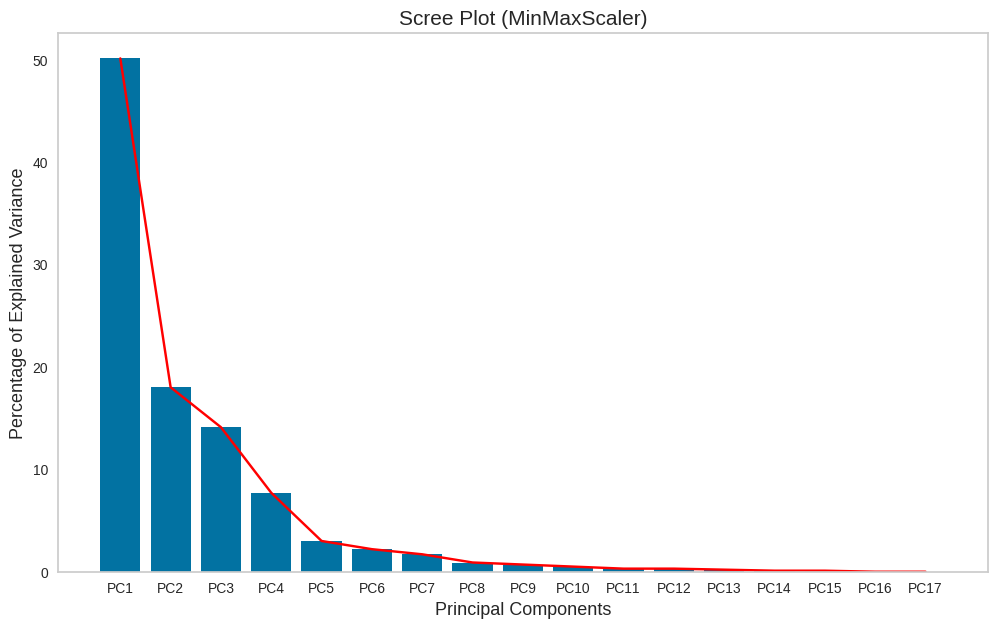

82.19999999999999% variance of the dataset lies on the first 3 Principal Components


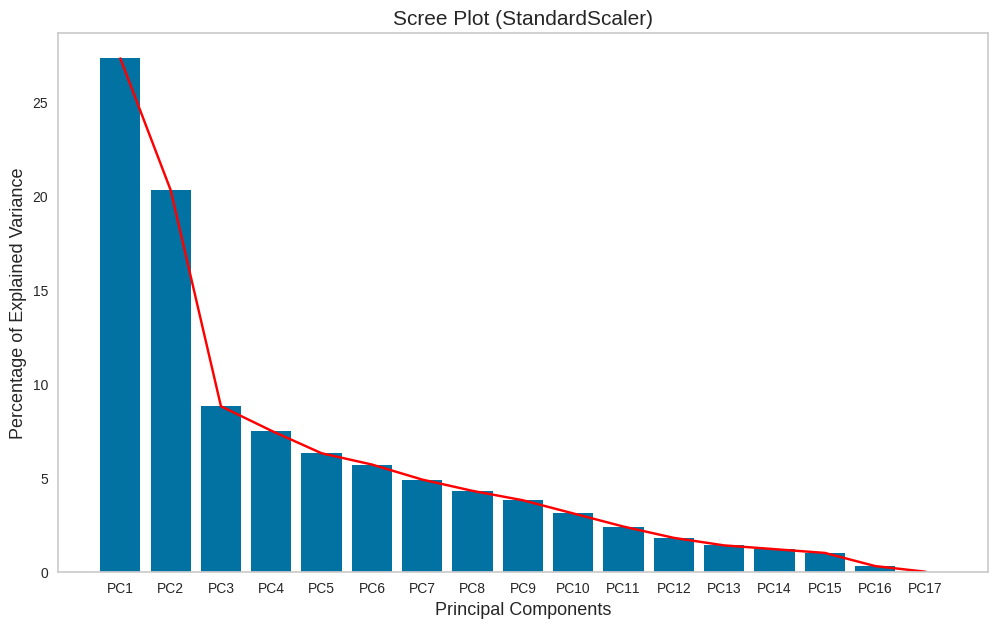

56.400000000000006% variance of the dataset lies on the first 3 Principal Components


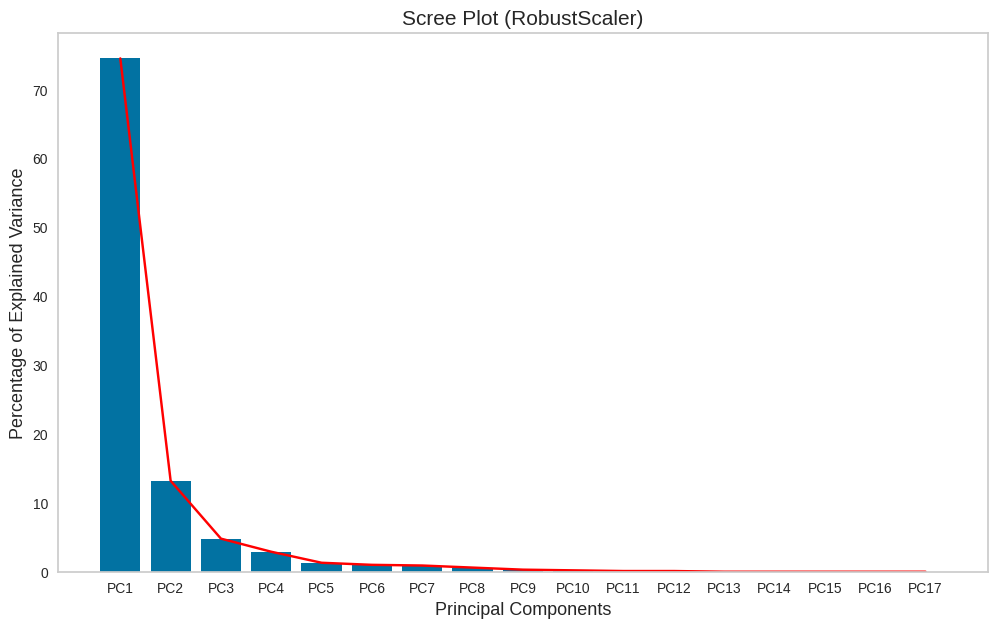

92.5% variance of the dataset lies on the first 3 Principal Components


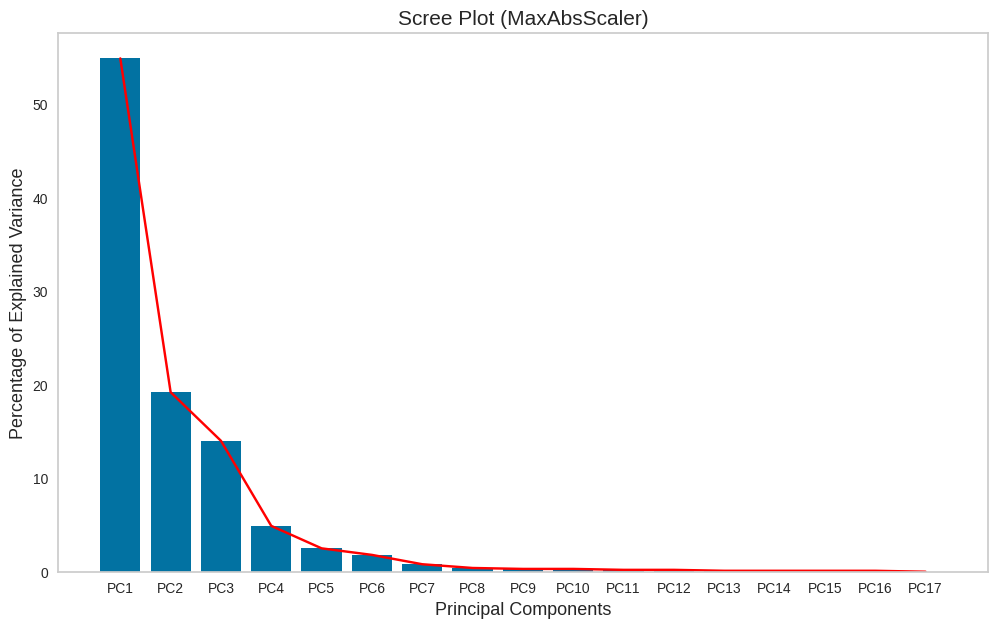

88.1% variance of the dataset lies on the first 3 Principal Components


In [ ]:
# Function to create a scree plot
def scree_plot(pca, scaler_name):
    per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
    labels = ['PC' + str(x) for x in range(1, len(per_var) + 1)]

    plt.figure(figsize=(12, 7))
    plt.bar(x=range(1, len(per_var) + 1), height=per_var, tick_label=labels)
    plt.plot(range(1, len(per_var) + 1), per_var, c='red')
    plt.ylabel('Percentage of Explained Variance', size=13)
    plt.xlabel('Principal Components', size=13)
    plt.title(f'Scree Plot ({scaler_name})', size=15)
    plt.grid()
    plt.show()
    print(f'{np.sum(per_var[:3])}% variance of the dataset lies on the first 3 Principal Components')

# Create scree plot for MinMaxScaler
pca_minMax_fitted = PCA(n_components=len(df.columns)).fit(minMaxScaler)
scree_plot(pca_minMax_fitted, 'MinMaxScaler')

# Create scree plot for StandardScaler
pca_standard_fitted = PCA(n_components=len(df.columns)).fit(StandardScaler)
scree_plot(pca_standard_fitted, 'StandardScaler')

# Create scree plot for RobustScaler
pca_robust_fitted = PCA(n_components=len(df.columns)).fit(robustScaler)
scree_plot(pca_robust_fitted, 'RobustScaler')

# Create scree plot for MaxAbsScaler
pca_maxAbs_fitted = PCA(n_components=len(df.columns)).fit(maxAbsScaler)
scree_plot(pca_maxAbs_fitted, 'MaxAbsScaler')

Since using MinMaxScaler() produced more distinct and well-defined clusters, and also improved PCA performance (with 3 components explaining 82.1% of the variance), we selected it as the scaling method for our data.

In [ ]:
# We scale the data using MinMaxScaler
scaled_data = MinMaxScaler().fit_transform(logscaled_data)
print(scaled_data)

[[0.57515728 0.95699513 0.59480847 ... 0.57333026 0.         1.        ]
 [0.87670623 0.97956273 0.         ... 0.71132651 0.68147922 1.        ]
 [0.85944629 1.         0.73062498 ... 0.67504508 0.         1.        ]
 ...
 [0.53654729 0.96092329 0.62171261 ... 0.53771971 0.70596131 0.        ]
 [0.49831516 0.96092329 0.         ... 0.51127809 0.70596131 0.        ]
 [0.72795711 0.91321433 0.75311087 ... 0.54237497 0.         0.        ]]


## Elbow Method to determine optimal number of clusters K

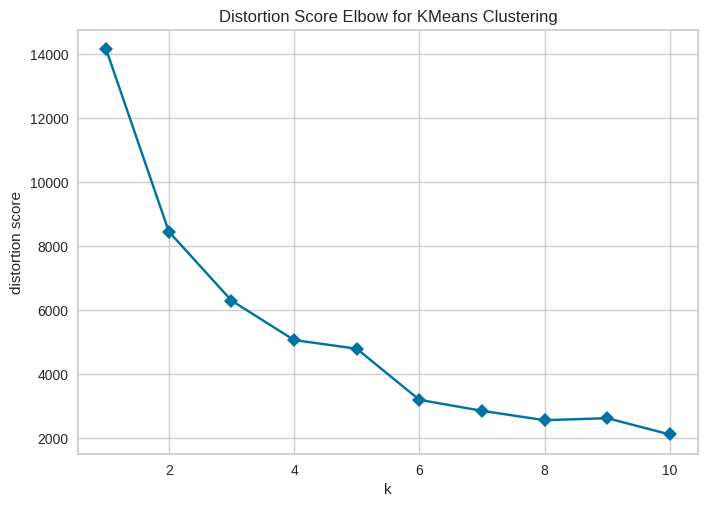

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Install yellowbrick library
!pip install yellowbrick

# Import KElbowVisualizer to use Elbow method
from yellowbrick.cluster import KElbowVisualizer

# Import KMeans library to use Kmeans algorithm
from sklearn.cluster import KMeans

# Identify a good number of clusters between 1 and 11, do not show the fitting time and do not suggest elbow value.
# By default, the parameter locate_elbow is set to True, which automatically find the “elbow” which likely corresponds to the optimal value of k using the “knee point detection algorithm”.
elbow_method = KElbowVisualizer(KMeans(), k=(1,11), timings=False, locate_elbow=False)
elbow_method.fit(scaled_data)
elbow_method.show()

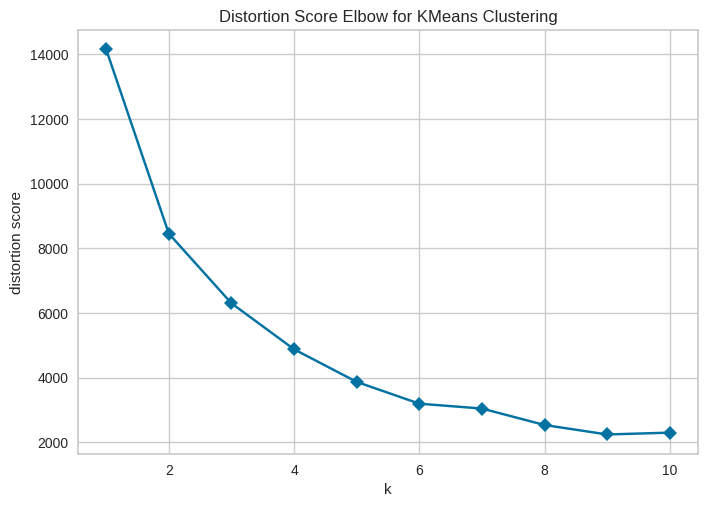

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Install yellowbrick library
!pip install yellowbrick

# Import KElbowVisualizer to use Elbow method
from yellowbrick.cluster import KElbowVisualizer

# Import KMeans library to use Kmeans algorithm
from sklearn.cluster import KMeans

# Identify a good number of clusters between 1 and 11, do not show the fitting time and do not suggest elbow value.
# By default, the parameter locate_elbow is set to True, which automatically find the “elbow” which likely corresponds to the optimal value of k using the “knee point detection algorithm”.
elbow_method = KElbowVisualizer(KMeans(), k=(1,11), timings=False, locate_elbow=False)
elbow_method.fit(scaled_data)
elbow_method.show()

We selected K = 4 as a balanced decision informed by both mathematical intuition and domain knowledge of credit card usage. Mathematically, beyond this point, the Sum of Squared Errors (SSE) decreases only marginally, suggesting limited benefit from adding more clusters. From a domain perspective, credit card holders are typically segmented based on their transactional behaviors—such as credit limit utilization, purchase activity, and cash advance frequency. In practice, these behaviors tend to form a few primary customer types, including transactors, revolvers, cash advance users, and low or inactive spenders. Therefore, using four clusters effectively captures the major behavioral distinctions without introducing unnecessary complexity or overfitting to minor variations.

In [ ]:
# Let us pick 4 clusters based on the Elbow Method
kmeans_model = KMeans(n_clusters=4, random_state=42, n_init=10)

# Run K-means algorithm with K=4
kmeans_model.fit(scaled_data)

KMeans(n_clusters=4, n_init=10, random_state=42)

To validate our mathematical intuition, we revisit the data to assess whether the four-cluster solution truly provides meaningful and actionable insights.

This evaluation focuses on examining the centroids of each cluster across all features to better understand their defining characteristics

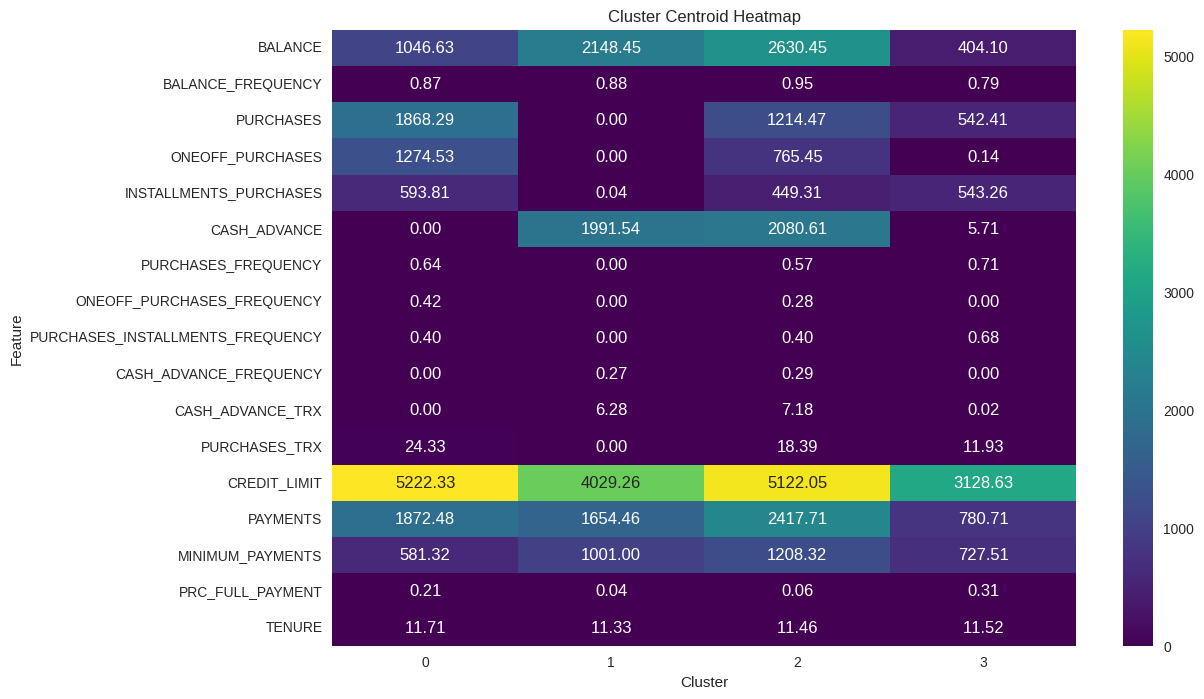

In [ ]:
# Calculate the mean of each feature for each cluster
data['Cluster'] = kmeans_model.labels_
cluster_means = data.groupby('Cluster').mean()
# Plot the table comparising the centroid of each cluster's features
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_means.T, annot=True, cmap='viridis', fmt=".2f")
plt.title('Cluster Centroid Heatmap')
plt.xlabel('Cluster')
plt.ylabel('Feature')
plt.show()

From the descriptive table, we can segment the data into four distinct groups:

Customer Segmentation with K-Means (4 Clusters)

**Cluster 0** (Transactors)

Profile: Customers who primarily use their credit card for purchases, not for borrowing.
Key Behaviors:
* Balance: Moderate (~1,046)
* Purchases: Highest (~1,868), with strong one-off and installment purchases.
* Cash Advances: None.
* Payments: Relatively high (1,871.94).
* PRC_FULL_PAYMENT: 0.21, largely higher than the figures for other clusters.

**Interpretation**: These are low-risk, credible customers. They actively spend and are disciplined in repayments. Often referred to as “Transactors.”


**Cluster 1** (Cash Advance Users)

Profile: Customers using the card mainly for cash advances, with very little to no purchase activity.

Key Behaviors:
* Purchases: Negligible (near zero across one-off and installments).
* Cash Advances: Very high (~1,991.97).
* Payments: Relatively low (1,652.85).
* PRC_FULL_PAYMENT: Extremely low (0.04).
* Tenure: Shorter compared to other groups.
**Interpretation**: This cluster represents “Revolvers” with risky financial behavior. They use credit cards as a borrowing tool, carry balances, and show weak repayment discipline.

**Cluster 2** (High Spenders / Revolvers)

Profile: The most active and high-usage group, making frequent purchases while also relying on cash advances.
Key Behaviors:

* Balance: Highest (~2,638).
* Purchases: High (~1,214), with both one-off and installment purchases.
* Cash Advances: Substantial (~2,092).
* Credit Limit: Highest (~5,134).
* Payments: Highest (~2,420), but PRC_FULL_PAYMENT remains very low (0.06).
**Interpretation**: These are high-value but risky customers. They generate significant revenue but tend to carry balances, making them revolvers with high credit exposure.

**Cluster 3** (Low Spenders / Inactive Users)

Profile: Customers with minimal activity and the lowest overall usage.
Key Behaviors:
* Balance: Lowest (~409).
* Purchases: Low (~543) with infrequent use.
* Cash Advances: Very small (~6.49).
* Credit Limit: Lowest (~3,129).
* Payments: Lowest (~782.57).
* PRC_FULL_PAYMENT: Highest (0.30), showing better repayment discipline.
**Interpretation**: These are inactive or low-value users. While they present little risk (due to small balances and better repayment habits), they also contribute the least revenue.

Group A (Less Risky, Credible)
* Cluster 0: Transactors - Active spenders, disciplined payers.
* Cluster 3: Low Spenders - Low activity, tend to pay in full.

Group B (Risky, Revolvers)
* Cluster 1: Cash Advance Users - Heavy cash withdrawals, weak repayment.
* Cluster 2: High Spenders / Revolvers - Big spenders with large balances, but carry debt.



## Train a K-Means Clustering Model with K = 4

In [ ]:
# Show cluster label of training data samples
kmeans_model.labels_

array([3, 1, 0, ..., 3, 1, 2], dtype=int32)

Each data point is assigned to one of 4 clusters.

Example: first sample → cluster 3, second → cluster 1, third → cluster 0, etc. This partitions the data into 4 distinct groups.

In [ ]:
# Make cluster label prediction of new data samples (assume here we use scaled_data as tes data samples).
kmeans_model.predict(scaled_data)

array([3, 1, 0, ..., 3, 1, 2], dtype=int32)

In [ ]:
# Show location of cluster centroids
kmeans_model.cluster_centers_

array([[7.19564432e-01, 9.53813352e-01, 7.38634452e-01, 7.15095816e-01,
        4.58274920e-01, 1.39332990e-14, 8.49148591e-01, 7.40776187e-01,
        5.37399282e-01, 1.98729921e-14, 7.27196081e-15, 6.73407615e-01,
        6.80701174e-01, 7.29680020e-01, 6.21715775e-01, 3.16147338e-01,
        9.57132659e-01],
       [7.98822170e-01, 9.56629354e-01, 5.28905479e-04, 5.35330451e-04,
        5.48380444e-04, 7.45631099e-01, 1.42753773e-03, 1.42753773e-03,
        5.40667237e-04, 6.73510602e-01, 6.31691772e-01, 1.96814819e-03,
        6.37164429e-01, 7.11076919e-01, 6.61000378e-01, 1.21066898e-01,
        8.99266523e-01],
       [8.27304094e-01, 9.85501408e-01, 7.09118591e-01, 5.65396389e-01,
        4.64681626e-01, 7.49618841e-01, 8.21151971e-01, 5.70571325e-01,
        5.51967098e-01, 6.85003300e-01, 6.44302760e-01, 6.48582332e-01,
        6.76629934e-01, 7.53046609e-01, 6.80472657e-01, 1.47915518e-01,
        9.19388644e-01],
       [5.99594717e-01, 9.06728790e-01, 6.71093953e-01, 2.128

## Dimensionality reduction with Principal Component Analysis (PCA)

In [ ]:
# Import PCA library
from sklearn.decomposition import PCA

# Find all principal components (i.e, eigen vectors of the covariance matrix, and eigen values) of the data, and equal to the number of data features.
pca = PCA(n_components=None)
pca.fit(scaled_data)
# After this cell runs, the pca object contains information about the principal components,
# such as the explained variance ratio for each component, which you examined in the next cell.

PCA()

In [ ]:
# Print the amount of variance carried in each principal components (eigenvalues). This is the eigen values.
print("Amount of variance carried in each principal components (eigen values) :\n" + str(pca.explained_variance_))

# Print the ratio of ammount of variance carried in each principal components (eigen values). The ratio is calculated by dividing the eigenvalue of each component by the sum of eigenvalues
print("\nRatio of variance carried in each principal components (eigen values) :\n" + str(pca.explained_variance_ratio_))

# Sum of all ratios must be 1
print("\nCummulative sum of all ratios :\n" + str(pca.explained_variance_ratio_.cumsum()))

# Note: by ranking the eigenvectors in order of their eigenvalues, highest to lowest, we get the principal components in order of significance.

Amount of variance carried in each principal components (eigen values) :
[7.93479838e-01 2.85707977e-01 2.22493845e-01 1.21422215e-01
 4.77575996e-02 3.44113738e-02 2.76790574e-02 1.46428061e-02
 1.17190212e-02 7.42663639e-03 4.97856055e-03 4.01074125e-03
 3.24143066e-03 1.37944744e-03 1.23061960e-03 7.65314833e-04
 6.91719945e-04]

Ratio of variance carried in each principal components (eigen values) :
[5.01238591e-01 1.80480784e-01 1.40548626e-01 7.67020119e-02
 3.01683178e-02 2.17375511e-02 1.74847690e-02 9.24981223e-03
 7.40286698e-03 4.69138165e-03 3.14494024e-03 2.53357199e-03
 2.04760103e-03 8.71392388e-04 7.77378332e-04 4.83446850e-04
 4.36957203e-04]

Cummulative sum of all ratios :
[0.50123859 0.68171938 0.822268   0.89897001 0.92913833 0.95087588
 0.96836065 0.97761046 0.98501333 0.98970471 0.99284965 0.99538322
 0.99743083 0.99830222 0.9990796  0.99956304 1.        ]


##3-dimensional PCA

In [ ]:
# We test the three most important principal components as they cover 82.1% (0.821) of the data variance.
pca3 = PCA(n_components=3)

# Fit (i.e., construct the 3-dimensional PCA space) and transform (i.e., project the original data points into the 3-dimensional PCA space).
pca3_data = pca3.fit_transform(scaled_data)

# Create a dataframe from the projected data points in 3-dimensional PCA space, namely "pca_1", "pca_2" and "pca_3"
pca3_df = pd.DataFrame(pca3_data, columns=["pca_1", "pca_2", "pca_3"])

In [ ]:
# Show the data frame
pca3_df

pca_1     pca_2     pca_3
0     0.177705 -0.682056 -0.196495
1    -1.377325 -0.242802  0.040483
2     0.385013  0.647528 -0.871973
3    -0.480682  0.631249 -0.298335
4    -0.137880  0.044727 -0.866146
...        ...       ...       ...
8937  0.710094 -0.898036  0.117573
8938  0.574859 -0.731919  0.162588
8939  0.615990 -0.876377  0.063906
8940 -1.234321 -0.494293 -0.226546
8941 -0.239722  1.007671 -0.132939

[8942 rows x 3 columns]

In [ ]:

fig = px.scatter_3d(pca3_df, x='pca_1', y='pca_2', z='pca_3', color=kmeans_model.labels_, title='3D PCA with K-Means Clusters')
fig.show()

From this 3D visualization, we confirm that K-Means Clustering is useful, since clusters are distinguishable and aligns with the groups divided as above.

**Cluster Compactness and Spread:**
* Some clusters (like the blue and yellow) appear more compact, suggesting those groups have customers with similar behaviors.

* The orange cluster is larger and more spread out, which means this group is more heterogeneous — customers in this segment share some broad characteristics, but with more variation.

**Business Interpretation of Segments**:
* Cluster 0 (blue/dark) → compact, likely Transactors (disciplined spenders, frequent purchases, pay in full often).
* Cluster 1 (purple) → small but distinct, likely Cash Advance Users (less common, but behaviorally different).
* Cluster 2 (orange) → large spread, likely High Spenders / Revolvers (diverse but heavy credit usage group).
* Cluster 3 (yellow) → smaller, compact, likely Inactive / Low Spenders (low variation, low activity).



## 2 Dimensional PCA

In [ ]:
# We test the two most important principal components as they cover 68% (0.68) of the data variance.
pca2 = PCA(n_components=2)

# Fit (i.e., construct the 2-dimensional PCA space) and transform (i.e., project the original data points into the 2-dimensional PCA space).
pca2_data = pca2.fit_transform(scaled_data)

# Create a dataframe from the projected data points in 2-dimensional PCA space, namely "pca_1" and "pca_2"
pca2_df = pd.DataFrame(pca2_data, columns=["pca_1", "pca_2"])

In [ ]:
pca2_df.head()

pca_1     pca_2
0  0.177705 -0.682056
1 -1.377325 -0.242802
2  0.385013  0.647528
3 -0.480682  0.631249
4 -0.137880  0.044727

/tmp/ipython-input-3661544794.py:11: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



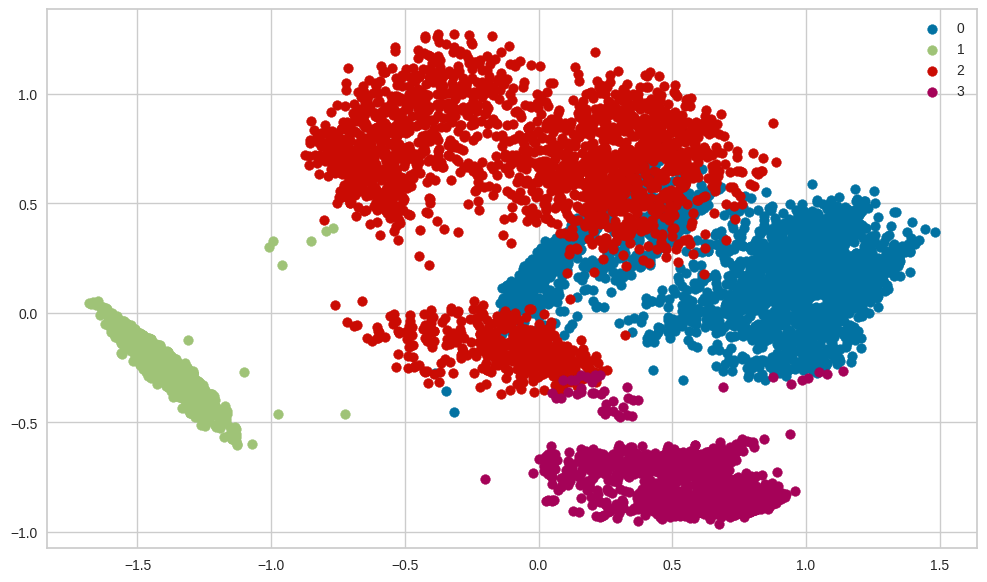

In [ ]:
# Visualize the cluster with legend
plt.figure(figsize=(12, 7))
ax = plt.subplot()

# List of labels
group = kmeans_model.labels_

# Plot data samples in each label group: 0, 1 and 2.
for g in np.unique(group):
    index = np.where(group==g)     # Get all indices of label group g
    ax.scatter(pca2_df.iloc[index].pca_1, pca2_df.iloc[index].pca_2, label=g, cmap="cool")     # Plot data points with label
ax.legend()
plt.show()

**Interpretation of the 2D PCA Plot
Cluster Distinction**

This again confirms that your choice of K=4 was appropriate, as the separation is visible even after dimensionality reduction.

**Cluster Shapes & Densities**
* The isolation of Cluster 1 (green) suggests a unique customer type with strong differentiating behavior — worth targeting separately.
* The large Cluster 2 (red) may need to be further segmented (maybe by income, spending patterns, or repayment style) since it is heterogeneous.
* The compact clusters (blue & purple) represent clearer segments that are easier to describe and act upon.

In [ ]:
# Save model using pickle library
import pickle
file_name = "model.sav"                              # Path to save the model
pickle.dump(kmeans_model, open(file_name, "wb"))     # Save the model to a pickle file

# Note: the kmeans_model is having three clusters.

In [ ]:
# Load the saved model using pickle library
file_name = "model.sav"
load_model = pickle.load(open(file_name, "rb"))

# Part 2: Discussion and Business Applications

**2.1 (1 point) Based on your exploration, which features seem most relevant for clustering credit card holders? Were there any features you initially thought were important but turned out not to be?**

Based on the cluster centroid heatmap, the features that appear most relevant for clustering credit card holders are:
* PURCHASES and CASH_ADVANCE: These strongly differentiate
transactors from revolvers and cash-advance users.
* PAYMENTS: Helps distinguish customers with high repayment capacity from those who carry balances.
* BALANCE: Reflect overall spending behavior, liquidity needs, and how responsibly balances are managed.
* Frequency Metrics (for purchases, cash advances, installments, etc.): Indicate engagement levels and usage styles across customer groups.
* Percent of Full Payment (PRC_FULL_PAYMENT): Useful as a proxy for creditworthiness, since it shows whether customers tend to settle balances fully.


On the other hand, some features initially expected to be important turned out to be less discriminative:
* BALANCE_FREQUENCY: Nearly constant across clusters, providing little separation.
* TENURE: Shows minimal variation, meaning customer time with the bank does not significantly impact their cluster membership in this dataset.

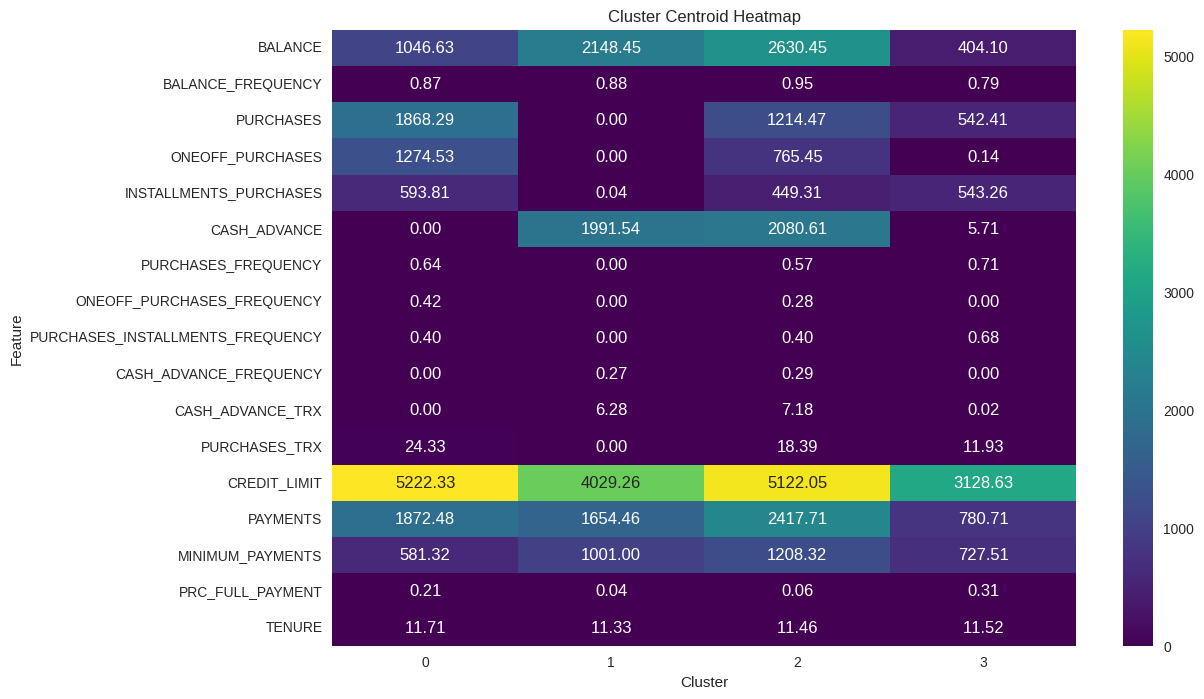

In [ ]:
# From the heat map, features showing great variation across clusters are more relevant for clustering
# Calculate the mean of each feature for each cluster
data['Cluster'] = kmeans_model.labels_
cluster_means = data.groupby('Cluster').mean()
# Plot the table comparising the centroid of each cluster's features
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_means.T, annot=True, cmap='viridis', fmt=".2f")
plt.title('Cluster Centroid Heatmap')
plt.xlabel('Cluster')
plt.ylabel('Feature')
plt.show()

**2.2 (1 point) Did the Elbow Method give a clear choice for K? If not, what alternative strategies could you have used to determine K?**

Based on the Elbow Method plot, the "elbow" or point of diminishing returns in the distortion score is not perfectly sharp. There is a noticeable bend around K=3 or K=4, and the decrease in distortion score continues but less steeply after that. While K=4 was chosen and justified based on domain knowledge and visual separation in PCA plots, the Elbow Method alone did not provide an unambiguously clear single best value for K.

If the Elbow Method is not clear, several alternative strategies could be used to determine the optimal number of clusters (K):

* Silhouette Method: This method calculates a silhouette score for each sample, which measures how similar a sample is to its own cluster compared to other clusters. The average silhouette score is then calculated for different values of K, and the K that yields the highest average silhouette score is often considered optimal. A higher silhouette score indicates that the clusters are well-separated.
* Davies-Bouldin Index: This index measures the ratio of within-cluster scatter to between-cluster separation. A lower Davies-Bouldin index indicates better clustering. The optimal K would minimize this index.
Calinski-Harabasz Index (Variance Ratio Criterion): This index is the ratio of the sum of between-cluster dispersion and within-cluster dispersion for all clusters. A higher Calinski-Harabasz index generally indicates better-defined clusters. The optimal K would maximize this index.
* Hierarchical Clustering:
* Gap Statistic: This method compares the total within-cluster variation for different values of K with the expected total within-cluster variation under a null reference distribution (e.g., a uniform distribution). The optimal K is where the gap statistic is maximized, indicating the clustering structure is significantly better than random.
* Domain Knowledge and Business Requirements: As demonstrated in this notebook, sometimes the choice of K is also guided by prior knowledge of the problem domain (e.g., expected customer segments) and the specific business objectives of the clustering. If a certain number of segments are required for strategic purposes, this can influence the final choice of K, especially when other metrics are ambiguous.
To illustrate an alternative method, we could generate a plot using the Silhouette Method.

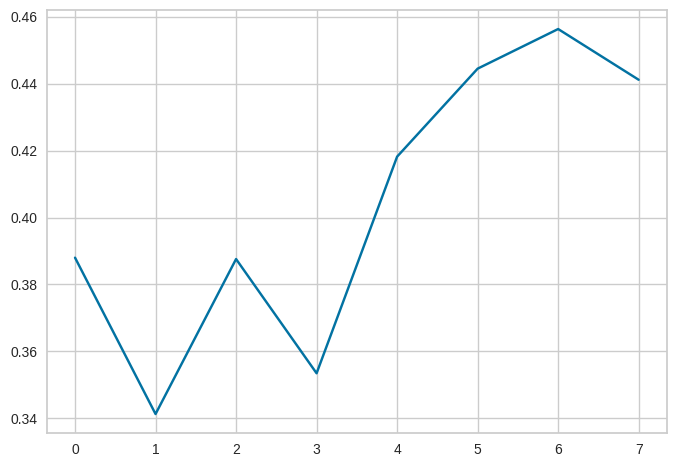

In [ ]:
# Import Silhouette Score
from sklearn.metrics import silhouette_score

# Calculate silhouette scores for different numbers of clusters
silh = []
for i in range(2, 10):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    labels = kmeans.labels_
    score = silhouette_score(scaled_data, kmeans.labels_)
    silh.append(score)
#Plot the silhouette scores
plt.plot(silh)
plt.show()


Silhouette score, together with the elbow method, would confirm the choice of optimal number K is 4.

In [ ]:
# We can also use Hierarchical Clustering method
# Import hierarchical clustering algorithm from scipy
from scipy.cluster import hierarchy

# Run the algorithm without specifying the number of clusters
clusters = hierarchy.linkage(scaled_data, method="ward") # 'ward' method: combine clusters to minimize within-cluster-variation

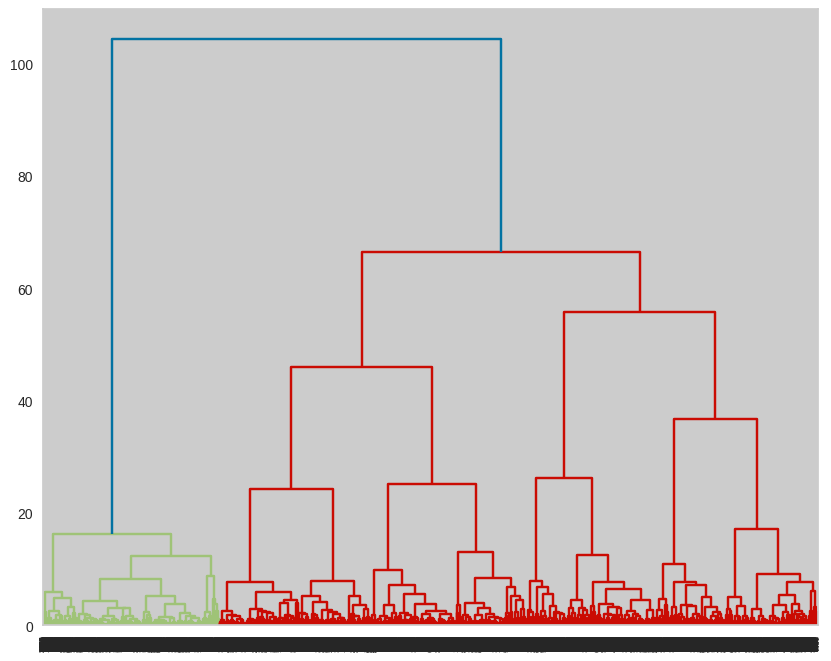

In [ ]:
# Plot the hierarchical clusters
plt.figure(figsize=(10, 8))
dendrogram = hierarchy.dendrogram(clusters)

In [ ]:
# Import AgglomerativeClustering from scikit-learn
from sklearn.cluster import AgglomerativeClustering

# Run the hierarchical clustering algorithm with
clustering = AgglomerativeClustering(n_clusters=3, linkage="ward").fit(scaled_data) # Perform the cut at 3 clusters
clustering.labels_

array([2, 1, 0, ..., 2, 1, 0])

In [ ]:
# Import TSNE library
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, random_state=123) # Initialize TSNE with the TSNE space dimension (n_components)
tsne_features = tsne.fit_transform(scaled_data) # Project data (high dimension) to TSNE space (low dimension)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 8942 samples in 0.002s...
[t-SNE] Computed neighbors for 8942 samples in 0.875s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8942
[t-SNE] Computed conditional probabilities for sample 2000 / 8942
[t-SNE] Computed conditional probabilities for sample 3000 / 8942
[t-SNE] Computed conditional probabilities for sample 4000 / 8942
[t-SNE] Computed conditional probabilities for sample 5000 / 8942
[t-SNE] Computed conditional probabilities for sample 6000 / 8942
[t-SNE] Computed conditional probabilities for sample 7000 / 8942
[t-SNE] Computed conditional probabilities for sample 8000 / 8942
[t-SNE] Computed conditional probabilities for sample 8942 / 8942
[t-SNE] Mean sigma: 0.093832
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.868881
[t-SNE] KL divergence after 1000 iterations: 0.975646


[Text(0.5, 1.0, 'Cluster visualization on a 2-dimensional space')]

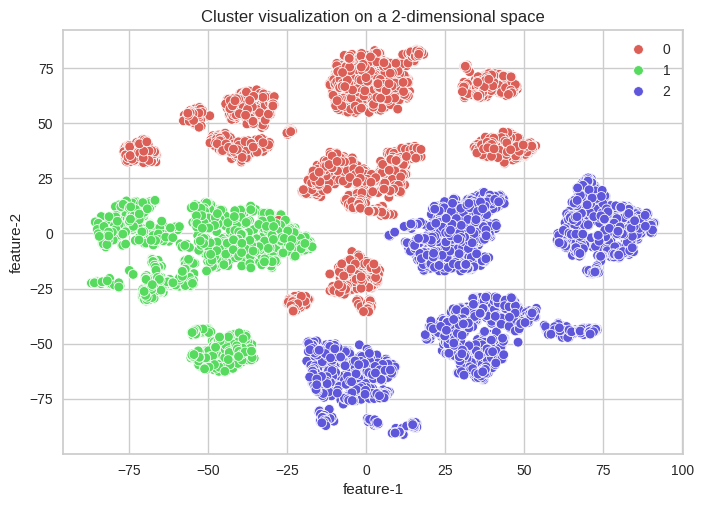

In [ ]:
# Import seaborn library for cluster visualization
import seaborn as sns

# Create a data frame with TSNE features and data label
df = pd.DataFrame()
df["label"] = clustering.labels_
df["feature-1"] = tsne_features[:,0]
df["feature-2"] = tsne_features[:,1]

# Visualize the clusters
sns.scatterplot(x="feature-1", y="feature-2", # Set the two TSNE features to the axes
                hue=df.label.tolist(), # Set the label
                palette=sns.color_palette("hls", 3), # Set cluster colors
                data=df).set(title="Cluster visualization on a 2-dimensional space") # Set dataframe to visulize and plot title

**Answer to 2.3:** (1 point) After clustering, do the resulting groups make intuitive sense? Can you describe typical characteristics of customers in each cluster?

In [ ]:
# Sample 5 data points from each cluster
for cluster_id in sorted(data['Cluster'].unique()):
    print(f"\nSamples from Cluster {cluster_id}:")
    display(data[data['Cluster'] == cluster_id].sample(5, random_state=42))


Samples from Cluster 0:


BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
7700    56.748977           1.000000     470.38            365.38   
4944    25.499945           0.727273      62.53             62.53   
3953   147.765977           0.363636    1328.94           1328.94   
1953  1925.094714           1.000000    5189.51           3609.24   
3011  1134.830372           1.000000     833.98            833.98   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
7700                  105.00           0.0             1.000000   
4944                    0.00           0.0             0.083333   
3953                    0.00           0.0             0.166667   
1953                 1580.27           0.0             1.000000   
3011                    0.00           0.0             1.000000   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
7700                    0.916667                          0.416667   
4944                    0.083333                          0.000000   
3953                    0.166667                          0.000000   
1953                    1.000000                          0.833333   
3011                    1.000000                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
7700                     0.0                 0             18        4500.0   
4944                     0.0                 0              1        1700.0   
3953                     0.0                 0              4        4000.0   
1953                     0.0                 0            102        7500.0   
3011                     0.0                 0             11        7500.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  Cluster  
7700   514.485790        207.790429          0.000000      12        0  
4944  1637.518241        110.864194          0.090909      12        0  
3953  4606.168653        107.749361          1.000000      12        0  
1953  5851.064420        492.876190          0.000000      12        0  
3011   285.231110        184.131460          0.000000       8        0


Samples from Cluster 1:


BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
1562  3630.771485           1.000000        0.0               0.0   
5628    47.783061           0.181818        0.0               0.0   
1874  1247.423771           1.000000        0.0               0.0   
2366   405.162601           0.545455        0.0               0.0   
6645  1597.911395           1.000000        0.0               0.0   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
1562                     0.0  10519.482520                  0.0   
5628                     0.0    545.183508                  0.0   
1874                     0.0    503.562164                  0.0   
2366                     0.0   4679.312402                  0.0   
6645                     0.0    162.919727                  0.0   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
1562                         0.0                               0.0   
5628                         0.0                               0.0   
1874                         0.0                               0.0   
2366                         0.0                               0.0   
6645                         0.0                               0.0   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
1562                0.666667                15              0        9000.0   
5628                0.166667                 2              0        3000.0   
1874                0.166667                 3              0        1500.0   
2366                0.250000                 8              0       17000.0   
6645                0.250000                 3              0        1800.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  Cluster  
1562  5171.793236        929.686078          0.090909      12        1  
5628     0.000000        864.206542          0.000000      12        1  
1874   721.897274        273.128967          0.000000      12        1  
2366  8946.495566        153.782546          0.750000      12        1  
6645   548.420841        416.956325          0.000000      12        1


Samples from Cluster 2:


BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
3733  1565.025253           1.000000    3035.98            785.60   
1517  5363.715074           1.000000     118.41            118.41   
1729   304.945628           1.000000    2788.81           2788.81   
2716   783.550476           0.777778     175.80            175.80   
1575  5805.320790           1.000000    1724.75           1638.97   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
3733                 2250.38   7003.112284             1.000000   
1517                    0.00   4344.905863             0.083333   
1729                    0.00    266.383091             0.727273   
2716                    0.00   2052.878473             0.444444   
1575                   85.78   1878.058967             0.833333   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
3733                    0.500000                          1.000000   
1517                    0.083333                          0.000000   
1729                    0.727273                          0.000000   
2716                    0.444444                          0.000000   
1575                    0.750000                          0.666667   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
3733                0.666667                36             94        2500.0   
1517                0.333333                 6              1        7000.0   
1729                0.090909                 6             22        4000.0   
2716                0.444444                 6              5        2500.0   
1575                0.083333                 1             29        7500.0   

          PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  Cluster  
3733  13562.879260       1709.158354          0.666667      12        2  
1517   1965.923460       1870.760877          0.000000      12        2  
1729   2803.353036        130.626533          0.714286      11        2  
2716   1647.886436        219.384407          0.000000       9        2  
1575   1351.901655       1419.470367          0.000000      12        2


Samples from Cluster 3:


BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
8190   12.039155           0.363636     100.00               0.0   
6904   42.852743           1.000000     381.20               0.0   
5299   97.168390           1.000000    1639.92               0.0   
8068    7.554365           1.000000      88.56               0.0   
7455  304.249156           0.909091    3127.98               0.0   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
8190                  100.00           0.0             0.181818   
6904                  381.20           0.0             0.916667   
5299                 1639.92           0.0             1.000000   
8068                   88.56           0.0             1.000000   
7455                 3127.98           0.0             0.833333   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
8190                         0.0                          0.181818   
6904                         0.0                          0.916667   
5299                         0.0                          1.000000   
8068                         0.0                          0.916667   
7455                         0.0                          0.833333   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
8190                     0.0                 0              2        3000.0   
6904                     0.0                 0             18        2500.0   
5299                     0.0                 0             12        2150.0   
8068                     0.0                 0             12        1500.0   
7455                     0.0                 0             10        6000.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  Cluster  
8190   406.868896         80.075627          0.333333      11        3  
6904   330.100638        174.766771          0.800000      12        3  
5299  1620.285733       1555.793076          0.083333      12        3  
8068    68.855232         73.081017          0.285714      12        3  
7455  3489.903640       3240.484290          0.714286      12        3



Yes, the resulting four clusters make intuitive sense and align well with common ways credit card customer bases are segmented based on their behavior. The clustering has successfully identified groups with distinct usage patterns, which is valuable for targeted strategies.

We have already described the typical characteristics of customers in each cluster in detail section "Elbow method to determine optimal number of K clusters".
*   **Cluster 0: Active Purchasers (Transactors/Light Revolvers):** These customers frequently use their cards for purchases (both one-off and installment), maintain moderate balances, and show a tendency towards higher full payment ratios compared to revolvers.
*   **Cluster 1: Cash Advance Users:** This is a distinct group characterized by very high cash advance activity and virtually no purchase activity. They tend to have moderate balances and low full payment ratios.
*   **Cluster 2: High Spenders / Heavy Revolvers:** These customers are heavy users of both purchases and cash advances. They carry very high balances, have high credit limits, and make large payments, but rarely pay their balance in full.
*   **Cluster 3: Low-Activity Customers (Inactive/Light Users):** This group exhibits very low activity across most features, including low balances, minimal purchases (mostly installment), no cash advances, and low payment amounts. They show a higher tendency for full payments among those with activity.

These segments represent plausible and intuitively understandable groups of credit card holders with different needs, risk profiles, and value to the business.

**Answer to 2.4:**

Businesses can benefit from a better understanding of customer portfolios, thereby providing targeted marketing, product development and developing better risk management plans. Overall, insightful customer segmentation can be valuable to the profitability and long-term growth of businesses.

Here are some examples of how businesses could use this segmentation:

*   **Targeted Marketing Campaigns:**
    *   **Cluster 0 (Active Purchasers):** Offer loyalty programs, rewards for spending milestones, or promotions on categories they frequently purchase in.

    *   **Cluster 1 (Cash Advance Users):** Provide alternatives to cash advances, such as lower-interest personal loans or financial counseling services. Marketing could focus on the high cost of cash advances.

    *   **Cluster 2 (High Spenders / Heavy Revolvers):** Offer premium cards with higher credit limits (if risk assessment allows), personalized credit management tools, or balance transfer options to consolidate debt. From K-Means clustering, this group also needs to be further segmented, perhaps from collecting more data within the group (age range, income, credit utilization ratio) and other metrics to better categorize the group.
    *   **Cluster 3 (Low-Activity Customers):** Run re-engagement campaigns with special offers for reactivating their card, offer personalized rewards. For example, if members frequently shop at specific retailers or buy certain categories, offer vouchers, rewards according to their preferences.

*   **Product Development and Customization:**
    *   Develop card products tailored to the needs of specific segments, e.g., a rewards card for active purchasers, a card with lower cash advance fees (if strategically viable), or a card with features that encourage responsible credit usage for high-balance revolvers.

*   **Risk Management:**
    *   Identify high-risk segments (like Cluster 1 - Cash Advance Users and potentially Cluster 2 - Heavy Revolvers) for closer monitoring, adjusted credit limits, or proactive outreach regarding payment difficulties.

*   **Customer Service:**
    *   Train customer service representatives to recognize the segment a customer belongs to and tailor their approach and recommended solutions accordingly.

**Example Marketing Strategy:**

Based on the segmentation, a credit card company could implement a marketing strategy focused on reducing the risky behavior of **Cluster 1 (Cash Advance Users)**.

1.  **Identify Cluster 1 members:** Use the clustering model to identify all customers belonging to this segment.
2.  **Develop targeted messaging:** Create a marketing campaign highlighting the high fees and interest rates associated with cash advances. The messaging could emphasize the long-term financial burden and suggest alternative, less costly ways to access funds if needed (e.g., personal loans).
3.  **Offer alternative products/services:** Promote lower-interest personal loan options available through the same bank or partner financial literacy resources.
4.  **Delivery channels:** Reach this segment through channels they are likely to engage with, such as targeted emails, mobile app notifications, or even direct mail.
5.  **Monitor impact:** Track the cash advance activity and balance levels of customers in Cluster 1 after the campaign to measure its effectiveness.

This targeted strategy is more likely to be effective than a generic campaign because it addresses the specific, high-risk behavior characteristic of this distinct customer segment.

**Answer to 2.5:**

Segmenting customers based on financial behavior, while beneficial for targeted strategies, raises several important ethical concerns that companies must carefully consider to ensure responsible use of this information.

Ethical Concerns:

*   **Bias and Discrimination:** Clustering algorithms can inadvertently pick up on biases present in the data, potentially leading to discriminatory practices. For example, segments could unintentionally correlate with protected characteristics (like socioeconomic status, geographic location, or even proxies for race or ethnicity), resulting in differential treatment that is unfair or illegal.
*   **Predatory Practices:** Identifying vulnerable segments (like those in financial distress, e.g., the "Cash Advance Users" in this model) could lead to predatory marketing or product offerings that exploit their situation rather than help them.
*   **Lack of Transparency:** Customers are often unaware of how they are being segmented or how that segmentation influences the products, services, or pricing they are offered. This lack of transparency can erode trust.
*   **Data Privacy and Security:** Financial behavior data is highly sensitive. Improper handling, storage, or sharing of this data used for segmentation poses significant privacy risks.
*   **Reinforcing Negative Cycles:** If segmentation leads to denying access to beneficial products (like lower interest rates or credit building tools) for certain segments, it could trap individuals in negative financial cycles.

Responsible Use of Information:

Companies can use customer segmentation information responsibly by implementing the following practices:

*   **Fairness and Equity:** Actively work to identify and mitigate bias in the data and the clustering process. Ensure that segmentation does not lead to discriminatory outcomes, particularly for vulnerable groups. Adhere to fair lending laws and regulations.
*   **Focus on Customer Well-being:** Use segmentation to offer products and services that genuinely benefit customers and support their financial health, rather than exploiting vulnerabilities. For instance, offering financial counseling or debt management tools to high-risk segments.
*   **Transparency (where appropriate):** While full transparency on segmentation logic might be complex, companies can be transparent about *how* customer data is used to personalize offers and improve services. Providing customers with insights into their financial behavior can also be empowering.
*   **Robust Data Governance:** Implement strong data privacy and security measures to protect sensitive financial information used for segmentation. Comply with relevant data protection regulations (e.g., GDPR, CCPA).
*   **Regular Auditing and Monitoring:** Continuously monitor the impact of segmentation strategies to ensure they are not leading to unintended negative consequences or perpetuating bias.
*   **Avoid Redlining:** Do not use geographic or demographic data in a way that leads to illegal or unethical redlining practices, where services are withheld from customers in specific areas.
*   **Empowerment, Not Exclusion:** Use segmentation to understand customer needs and tailor solutions that empower them financially, rather than using it as a tool for exclusion or unfair gatekeeping of services.

By prioritizing ethical considerations and implementing responsible data practices, companies can leverage the power of customer segmentation to improve their business while also treating customers fairly and promoting financial well-being.